In [1]:
#reloads imported library automatically
from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.constants as con

import sys 
if ".." not in sys.path: sys.path.insert(0,"..") # add parent folder path
import LittleFunction #so we can still access this file

In [3]:
data = LittleFunction.ReadMuonsFromCSV('muonOuput10000.csv')
data = LittleFunction.ReadMuonsFromCSV('muonOuput275_energy.csv')

# print(data)

angle = data[2] 
energy = data[3] #GeV
entries = data[4]
exits = data[5]

In [4]:
r = []

for i in range(len(exits)):
    r.append(np.sqrt(entries[i][0]**2 +entries[i][1]**2  ))


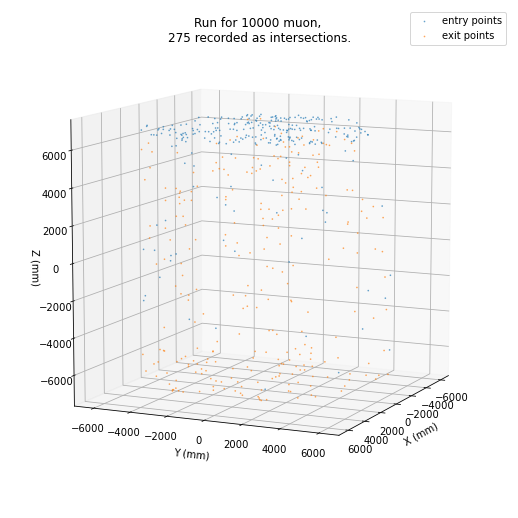

In [5]:
fig = plt.figure(figsize=(7,7))
ax = mplot3d.Axes3D(fig)

ax.set_title("Run for {} muon, \n{} recorded as intersections.".format(10000, len(entries)))

ax.scatter(entries[:,0],entries[:,1],entries[:,2], label='entry points', alpha=0.6, s=0.5)
ax.scatter(exits[:,0],exits[:,1],exits[:,2], label='exit points', alpha=0.6, s=0.5)

# ax.scatter(cryoentries[:,0],cryoentries[:,1],cryoentries[:,2], label='cryostat entry points', alpha=0.6, s=0.5)
# ax.scatter(cryoexits[:,0],cryoexits[:,1],cryoexits[:,2], label='cryostat exit points', alpha=0.6, s=0.5)

ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
plt.legend()

ax.view_init(10, 25)
plt.show()
#plt.savefig("enteries_exits_10k_discSameAsODradius.pdf")

## Getting timing from muon

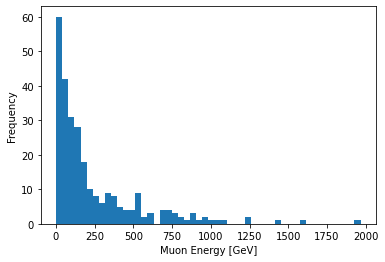

In [9]:
plt.hist(energy, bins=50)
plt.xlabel("Muon Energy [GeV]")
plt.ylabel("Frequency")
plt.show() 

In [11]:
### Get beta from muon energy###
gamma = energy/0.10566 #divide by the muon mass [0.10566 GeV]
beta =  np.sqrt(1.0 - 1.0/(gamma**2.0)) #should be [.9, .99]
n = 1.33 #approximate index of refraction of water

c = con.c #m/s
c

299792458.0

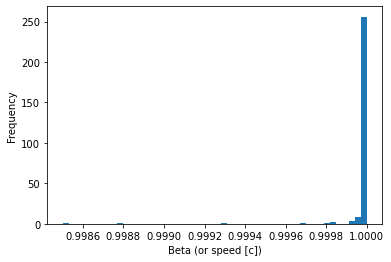

In [18]:
plt.hist(beta, bins=50)
plt.xlabel("Beta (or speed [c])")
plt.ylabel("Frequency")
plt.show() 

MuonSpeed = beta*c #m/s
# MuonSpeed

In [22]:
entries1 = entries[0]
# print(entries1)
Length = np.linalg.norm(entries - exits, axis=1) #mm
# Length = np.linalg.norm(entries1 - exits, axis=1) #mm

UnitDirection = [(entries[i] - exits[i]) / Length[i] for i in range(len(Length))]

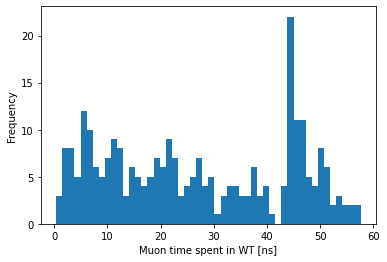

In [23]:
# time for muon inside WT
Length_m = Length/1000.
#so instead we would just need the distance to the photon create point here, instead of the total distance

#v=d/t
muonTime = Length_m/MuonSpeed * 1e9 #ns

plt.hist(muonTime, bins=50)
plt.xlabel("Muon time spent in WT [ns]")
plt.ylabel("Frequency")
plt.show() 